# 3.데이터프레임 조회

- 보고자 하는 데이터를 즉시 조회할 수 있도록 반복 학습과 실습을 통해 익숙해져야 합니다.
- 데이터프레임을 대상으로 조회하는 방법은 다양합니다.
- 그 중 한 가지 방법을 선택해 일관되게 사용하기를 권고합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

## 3.1.데이터 읽어오기

In [4]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 3.2.특정 열 조회

- **df.loc[ : , [열 이름1, 열 이름2,...]]** 형태로 조회할 열 이름을 리스트로 지정합니다.
- 조회할 열이 하나면 리스트 형태가 아니어도 됩니다.
- 열 부분은 생략할 수 있었지만, **행 부분을 생략할 수는 없습니다.**
- 하지만 **df[[열 이름1, 열 이름2,...]]** 형태로 인덱서를 생략함이 일반적입니다.

In [10]:
tip.loc[ : , ['total_bill'] ]

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [6]:
# total_bill 열 조회.......시리즈형태
tip.loc[:,'tip']

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

<AxesSubplot:ylabel='Frequency'>

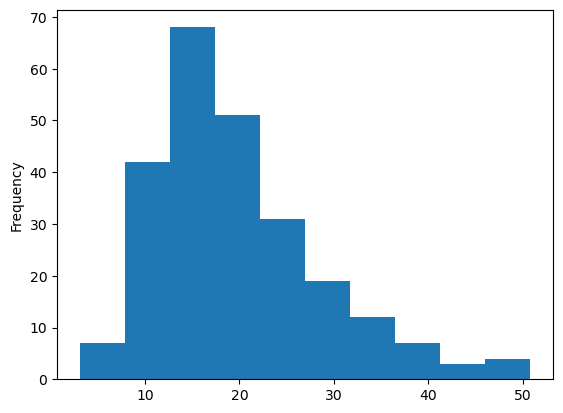

In [13]:
tip['total_bill'].plot(kind = 'hist')

In [23]:
# tip, total_bill 열 조회
tip.loc[ : ,['tip','total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] tip 데이터프레임에 대해 아래 요구사항에 맞는 구문을 작성하고 실행하세요.

In [ ]:
# 상위 5개 행 조회


In [24]:
# tip 열만 조회
tip.loc[ : ,['tip']]

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [25]:
# tip, day, time 열만 조회
tip.loc[ : ,['tip','day','time']]

,tip,day,time
0,1.01,Sun,Dinner
1,1.66,Sun,Dinner
2,3.50,Sun,Dinner
3,3.31,Sun,Dinner
4,3.61,Sun,Dinner
...,...,...,...
239,5.92,Sat,Dinner
240,2.00,Sat,Dinner
241,2.00,Sat,Dinner
242,1.75,Sat,Dinner


In [28]:
# tip, day, time 열만 tip 열 기준으로 내림차순 정렬해서 조회
tip.loc[ : ,['tip','day','time']].sort_values(by = 'tip', ascending = False)

,tip,day,time
170,10.00,Sat,Dinner
212,9.00,Sat,Dinner
23,7.58,Sat,Dinner
59,6.73,Sat,Dinner
141,6.70,Thur,Lunch
...,...,...,...
0,1.01,Sun,Dinner
236,1.00,Sat,Dinner
111,1.00,Sat,Dinner
67,1.00,Sat,Dinner


## 3.3.열 범위 조회

- 범위 조회는 **df.loc[:, 열 이름1:열 이름2]** 형태로 조회합니다.
- 범위는 하나만 지정할 수 있어 리스트가 될 수 없으니 대괄호를 사용하지 않습니다.
- 리스트란 묶으려고 쓰는 건데 범위는 이미 한 덩어리라 또 묶을 필요가 없다.!
- 범위 마지막 열도 조회 대상에 포함됨니다.
- 범위 조회는 반드시 loc가 있어야함,.


In [31]:
# sex ~ time 열 조회
tip.loc[ : , 'tip':'time']

,tip,sex,smoker,day,time
0,1.01,Female,No,Sun,Dinner
1,1.66,Male,No,Sun,Dinner
2,3.50,Male,No,Sun,Dinner
3,3.31,Male,No,Sun,Dinner
4,3.61,Female,No,Sun,Dinner
...,...,...,...,...,...
239,5.92,Male,No,Sat,Dinner
240,2.00,Female,Yes,Sat,Dinner
241,2.00,Male,Yes,Sat,Dinner
242,1.75,Male,No,Sat,Dinner


## 3.4.조건으로 조회

- **df.loc[조건]** 형태로 조건을 지정해 조건에 만족하는 데이터만 조회할 수 있습니다.
- 우선 조건이 제대로 판단이 되는지 확인한 후 그 **조건을 대 괄호 안에** 넣으면 됩니다.
- 조건도 마찬가지로 loc
- 근데 뒤에꺼는 생략가능....

**1) 단일 조건 조회**

In [36]:
# tip 열 값이 6.0 보다 큰 행 조회

tip.loc[ tip['tip']>6.0]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


- 조건을 변수로 선언해 사용할 수 있습니다.

In [38]:
# tip 열 값이 6.0 보다 큰 행 조회

cond = tip['tip'] > 6
tip.loc[cond]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


**2) 여러 조건 조회**

- [ ]안에 조건을 여러개 연결할 때 **and와 or 대신에 &와 |**를 사용해야 합니다.
- 그리고 각 조건들은 **(조건1) & (조건2)** 형태로 **괄호**로 묶어야 합니다. 중요 !!!!!!!!!!!!!!

In [41]:
# and로 여러 조건 연결 (tip > 6.0 and day == sat)
tip.loc[ (tip['tip']>6.0) & (tip['day'] == 'Sat') , : ]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [ ]:
# or로 여러 조건 연결 (tip > 6.0 or day == sat)


**3) 편리한 isin(), between() 메소드**

- **isin([값1, 값2,..., 값n])**: 값1 또는 값2 또는...값n인 데이터만 조회합니다.

In [45]:
# 값 나열 (day가 sat 또는 sun)

tip.loc[tip['day'].isin(['Sat','Sun']) , : ]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


- 위 구문은 다음과 같은 의미를 갖습니다.

In [46]:
# or 조건
tip.loc[(tip['day'] == 'Sat') | (tip['day'] == 'Sun')]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


- **between(값1, 값2)**: 값1 ~ 값2까지 범위안의 데이터만 조회합니다.

In [48]:
# 범위 지정 ( 1 <= size <= 3)

tip.loc[tip['size'].between( 2,3 ) , : ]



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- 위 구문은 다음과 같은 의미를 갖습니다.

In [49]:
# and 조건
tip.loc[(tip['size'] >= 1) & (tip['size'] <= 3)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**4) 조건을 만족하는 행의 일부 열 조회**

- **df.loc[조건, ['열 이름1', '열 이름2',...]]** 형태로 조회할 열을 리스트로 지정합니다.

In [52]:
# 조건에 맞는 하나의 열 조회
tip.loc[tip['size'] >= 5, ['tip']]

,tip
125,4.20
141,6.70
142,5.00
143,5.00
155,5.14
156,5.00
185,5.00
187,2.00
216,3.00


In [ ]:
# 조건에 맞는 여러 열 조회
tip.loc[tip['size'] >= 5, ['total_bill', 'tip', 'size']]

## 3.5.조회 정리


- 지금까지 배운 데이터프레임 조회에 대해 정리합니다. 

<img src='https://raw.githubusercontent.com/jangrae/img/master/loc.png' width=750 align="left"/>

- 굵게 표시된 코드형태로 조회하되, 원래 코드가 무엇인지는 꼭 알고 있어야 합니다.
- 조건 조회 시 열 정보가 생략되면 loc 를 생략할 수 있으나 생략하지 않기를 권고합니다.
- df['score'] 를 df.score로 작성할 수 있으나 df['score'] 형태로 사용하기를 권고합니다.

## 3.6.인덱스 초기화

- 다음과 같은 경우 인덱스 초기화가 필요합니다.
    - 기존 데이터프레임에서 일부 행을 가져와 새로 만든 데이터프레임
    - 일부 행이 지워진 데이터프레임
- 특히 0부터 시작하는 정수형 인덱스의 경우 초기화를 하는 것이 좋습니다.
- 깔끔한 데이터가 사용하기 좋은 데이터입니다.

In [54]:
# tip 열이 6 이상인 행 축출
good = tip.loc[tip['tip'] >= 6]

# 확인
good

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


- **reset_index()** 메소드로 인덱스를 초기화합니다.
- 기존 인덱스 값은 의미가 없으므로 drop=True 옵션을 지정해 제거합니다.
- inplace=True 옵션을 지정하지 않으면 실제 반영되지 않습니다.


In [55]:
# 인덱스 초기화

good.reset_index(drop = True, inplace =  True)
# 확인
good.head()

,total_bill,tip,sex,smoker,day,time,size
0,39.42,7.58,Male,No,Sat,Dinner,4
1,32.40,6.00,Male,No,Sun,Dinner,4
2,48.27,6.73,Male,No,Sat,Dinner,4
3,34.30,6.70,Male,No,Thur,Lunch,6
4,50.81,10.00,Male,Yes,Sat,Dinner,3
